In [3]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import scipy as sp

In [4]:
df = xr.open_dataset('C:/Users/eirik/Master/Data/fullYear_S_Eta_EKE_Depth_hor_vel_SIarea_Temp.nc')
df_U = xr.open_dataset('C:/Users/eirik/Master/Data/U_interp.nc')
df_V = xr.open_dataset('C:/Users/eirik/Master/Data/V_interp.nc')

In [5]:
display(df)

<xarray.Dataset>
Dimensions:    (Z: 10, Zp1: 11, Zu: 10, Zl: 10, X: 435, Y: 47, Xp1: 436,
                Yp1: 48, time: 1460, time_midp: 1459)
Coordinates: (12/18)
  * Z          (Z) float64 -3.5 -7.0 -11.5 -17.0 ... -39.5 -49.0 -59.5 -71.0
  * Zp1        (Zp1) float64 -2.0 -5.0 -9.0 -14.0 ... -44.0 -54.0 -65.0 -77.0
  * Zu         (Zu) float64 -5.0 -9.0 -14.0 -20.0 ... -44.0 -54.0 -65.0 -77.0
  * Zl         (Zl) float64 -2.0 -5.0 -9.0 -14.0 ... -35.0 -44.0 -54.0 -65.0
  * X          (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y          (Y) float64 72.0 72.02 72.04 72.07 ... 72.93 72.95 72.97 73.0
    ...         ...
  * time       (time) datetime64[ns] 2017-09-01 ... 2018-08-31T18:00:00
    YU         (Y, Xp1) float64 ...
    XU         (Y, Xp1) float64 ...
    YV         (Yp1, X) float64 ...
    XV         (Yp1, X) float64 ...
  * time_midp  (time_midp) datetime64[ns] 2017-09-01T03:00:00 ... 2018-08-31T...
Data variables:
    Depth      (Y, X) float64 ...
    Temp       (time, Z, Y, X) float64 ...
    S          (time, Z, Y, X) float64 ...
    Eta        (time, Y, X) float64 ...
    SIarea     (time, Y, X) float64 ...
    hor_vel    (time, Z, Y, X) float64 ...
    EKE        (time, Z, Y, X) float64 ...
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': None, ...
    OceanSpy_grid_periodic:  []

In [6]:
df_mean_month = df.resample(time='M').mean(dim='time')

c:\Users\eirik\anaconda3\envs\MSc_Env1\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


In [7]:
display(df_mean_month)

<xarray.Dataset>
Dimensions:    (Z: 10, Zp1: 11, Zu: 10, Zl: 10, X: 435, Y: 47, Xp1: 436,
                Yp1: 48, time: 12, time_midp: 1459)
Coordinates: (12/18)
  * Z          (Z) float64 -3.5 -7.0 -11.5 -17.0 ... -39.5 -49.0 -59.5 -71.0
  * Zp1        (Zp1) float64 -2.0 -5.0 -9.0 -14.0 ... -44.0 -54.0 -65.0 -77.0
  * Zu         (Zu) float64 -5.0 -9.0 -14.0 -20.0 ... -44.0 -54.0 -65.0 -77.0
  * Zl         (Zl) float64 -2.0 -5.0 -9.0 -14.0 ... -35.0 -44.0 -54.0 -65.0
  * X          (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y          (Y) float64 72.0 72.02 72.04 72.07 ... 72.93 72.95 72.97 73.0
    ...         ...
    YU         (Y, Xp1) float64 72.0 72.0 72.0 72.0 72.0 ... 73.0 73.0 73.0 73.0
    XU         (Y, Xp1) float64 -19.99 -19.94 -19.89 ... -0.06902 -0.01844
    YV         (Yp1, X) float64 72.0 72.0 72.0 72.0 ... 73.01 73.01 73.01 73.01
    XV         (Yp1, X) float64 -19.97 -19.92 -19.87 ... -0.09658 -0.04373
  * time_midp  (time_midp) datetime64[ns] 2017-09-01T03:00:00 ... 2018-08-31T...
  * time       (time) datetime64[ns] 2017-09-30 2017-10-31 ... 2018-08-31
Data variables:
    Depth      (time, Y, X) float64 245.3 242.2 240.0 ... 2.678e+03 2.564e+03
    Temp       (time, Z, Y, X) float64 1.559 1.562 1.555 ... 1.772 1.771 1.757
    S          (time, Z, Y, X) float64 31.52 31.52 31.51 31.5 ... 34.9 34.9 34.9
    Eta        (time, Y, X) float64 0.1562 0.1551 0.1546 ... -0.1733 -0.1731
    SIarea     (time, Y, X) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    hor_vel    (time, Z, Y, X) float64 0.1426 0.1412 0.143 ... 0.09785 0.09513
    EKE        (time, Z, Y, X) float64 0.01066 0.01137 ... 0.001953 0.001935
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': None, ...
    OceanSpy_grid_periodic:  []

In [8]:
depth = df.Depth
Temp = df_mean_month.Temp
Temp = Temp.sel(Z=-3.5)
S = df_mean_month.S
S = S.sel(Z=-3.5)
Eta = df_mean_month.Eta
SIarea = df_mean_month.SIarea
hor_vel = df_mean_month.hor_vel
hor_vel = hor_vel.sel(Z=-3.5)
EKE = df_mean_month.EKE
EKE = EKE.sel(Z=-3.5)

In [9]:
# fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=[14,12],sharex=True,layout='constrained')

# name = str(df_mean_month.time[0].values)
# name = 'Mean'+name[0:7]
# fig.suptitle(name,fontweight='bold',fontsize=14)

# # ax1 Temp
# mesh1 = ax1.pcolormesh(Temp.X,Temp.Y,Temp[0],cmap = cmo.thermal)
# cbar1 = fig.colorbar(mesh1)
# cbar1.set_label('Temperature [$^o$C]')
# cntr1 = ax1.contour(depth.X,depth.Y,depth,colors='grey')

# # ax2 Salinity
# mesh2 = ax2.pcolormesh(S.X,S.Y,S[0],cmap=cmo.haline)
# cbar2 = fig.colorbar(mesh2)
# cbar2.set_label('Salinity [g kg$^-$$^1$]')
# cntr2 = ax2.contour(depth.X,depth.Y,depth,colors='grey')

# # ax3 Eta/SSH
# mesh3 = ax3.pcolormesh(Eta.X,Eta.Y,Eta[0],cmap='seismic',vmin=-0.3,vmax=0.3)
# cbar3 = fig.colorbar(mesh3)
# cbar3.set_label('SSH above geoid [m]')
# cntr3 = ax3.contour(depth.X,depth.Y,depth,colors='grey')

# # ax4 SIarea
# mesh4 = ax4.pcolormesh(SIarea.X,SIarea.Y,SIarea[0],cmap=cmo.ice,vmin=0,vmax=1)
# cbar4 = fig.colorbar(mesh4)
# cbar4.set_label('Sea-Ice fraction [m$^2$ m$^-$$^2$]')
# cntr4 = ax4.contour(depth.X,depth.Y,depth,colors='grey')

# # ax5 hor_vel
# mesh5 = ax5.pcolormesh(hor_vel.X,hor_vel.Y,hor_vel[0],cmap=cmo.speed)
# cbar5 = fig.colorbar(mesh5)
# cbar5.set_label('Horizontal velocity [m s$^-$$^1$]')
# cntr5 = ax5.contour(depth.X,depth.Y,depth,colors='grey')

# # ax6 EKE
# mesh6 = ax6.pcolormesh(EKE.X,EKE.Y,EKE[0],cmap=cmo.speed)
# cbar6 = fig.colorbar(mesh6)
# cbar6.set_label('EKE [m$^2$ s$^-$$^2$]')
# cntr6 = ax6.contour(depth.X,depth.Y,depth,colors='grey')

# plt.savefig(f'C:/Users/eirik/Master/Figures/{name}')

In [10]:
# for i in range(len(df_mean_month.time)):
#     fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=[14,12],sharex=True,layout='constrained')

#     name = str(df_mean_month.time[i].values)
#     name = 'Mean'+name[0:7]
#     fig.suptitle(name,fontweight='bold',fontsize=14)

#     # ax1 Temp
#     mesh1 = ax1.pcolormesh(Temp.X,Temp.Y,Temp[i],cmap = cmo.thermal,vmin=-1,vmax=7)
#     cbar1 = fig.colorbar(mesh1)
#     cbar1.set_label('Temperature [$^o$C]')
#     cntr1 = ax1.contour(depth.X,depth.Y,depth,colors='grey')

#     # ax2 Salinity
#     mesh2 = ax2.pcolormesh(S.X,S.Y,S[i],cmap=cmo.haline,vmin=31,vmax=35)
#     cbar2 = fig.colorbar(mesh2)
#     cbar2.set_label('Salinity [g kg$^-$$^1$]')
#     cntr2 = ax2.contour(depth.X,depth.Y,depth,colors='grey')

#     # ax3 Eta/SSH
#     mesh3 = ax3.pcolormesh(Eta.X,Eta.Y,Eta[i],cmap='seismic',vmin=-0.3,vmax=0.3)
#     cbar3 = fig.colorbar(mesh3)
#     cbar3.set_label('SSH above geoid [m]')
#     cntr3 = ax3.contour(depth.X,depth.Y,depth,colors='grey')

#     # ax4 SIarea
#     mesh4 = ax4.pcolormesh(SIarea.X,SIarea.Y,SIarea[i],cmap=cmo.ice,vmin=0,vmax=1)
#     cbar4 = fig.colorbar(mesh4)
#     cbar4.set_label('Sea-Ice fraction [m$^2$ m$^-$$^2$]')
#     cntr4 = ax4.contour(depth.X,depth.Y,depth,colors='grey')

#     # ax5 hor_vel
#     mesh5 = ax5.pcolormesh(hor_vel.X,hor_vel.Y,hor_vel[i],cmap=cmo.speed,vmin=0.1,vmax=0.8)
#     cbar5 = fig.colorbar(mesh5)
#     cbar5.set_label('Horizontal velocity [m s$^-$$^1$]')
#     cntr5 = ax5.contour(depth.X,depth.Y,depth,colors='grey')

#     # ax6 EKE
#     mesh6 = ax6.pcolormesh(EKE.X,EKE.Y,EKE[i],cmap=cmo.speed,vmin=0,vmax=0.3)
#     cbar6 = fig.colorbar(mesh6)
#     cbar6.set_label('EKE [m$^2$ s$^-$$^2$]')
#     cntr6 = ax6.contour(depth.X,depth.Y,depth,colors='grey')

#     plt.savefig(f'C:/Users/eirik/Master/Figures/{name}')

In [11]:
df_U = df_U.U_interp
df_V = df_V.V_interp
U = df_U.resample(time='M').mean(dim='time')
U = U.sel(Z=-1)
V = df_V.resample(time='M').mean(dim='time')
V = V.sel(Z=-1)

c:\Users\eirik\anaconda3\envs\MSc_Env1\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(
c:\Users\eirik\anaconda3\envs\MSc_Env1\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


In [12]:
# for i in range(len(U.time)):
#     fig, ax = plt.subplots(figsize=[15,5],layout='constrained')
    
#     name = str(U.time[i].values)
#     name = 'Mean'+name[0:7]
#     fig.suptitle(name,fontweight='bold',fontsize=14)

#     ax.quiver(U.Xp1,U.Yp1,U[i],V[i],alpha=0.5)
#     ax.contour(depth.X,depth.Y,depth,colors='grey')

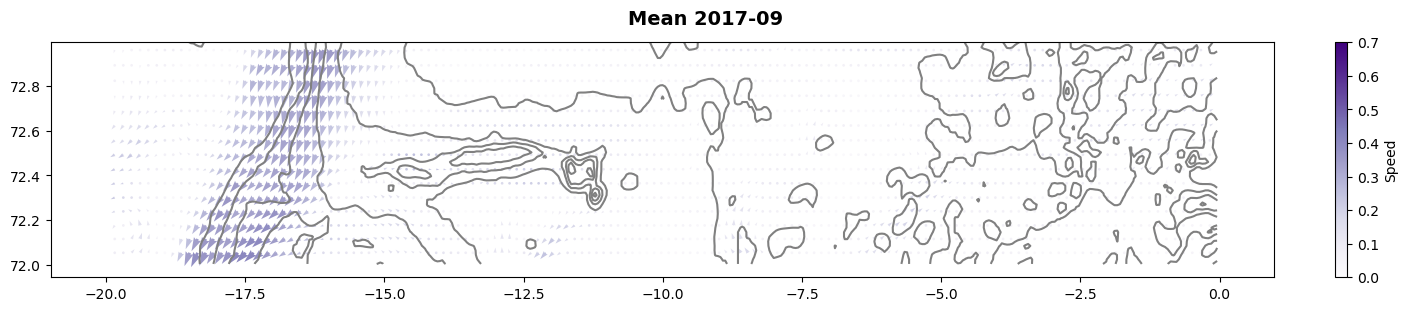

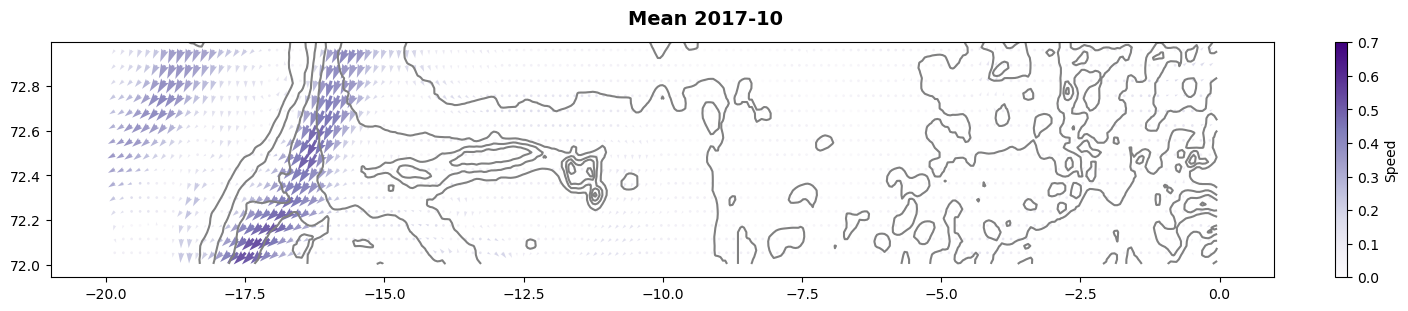

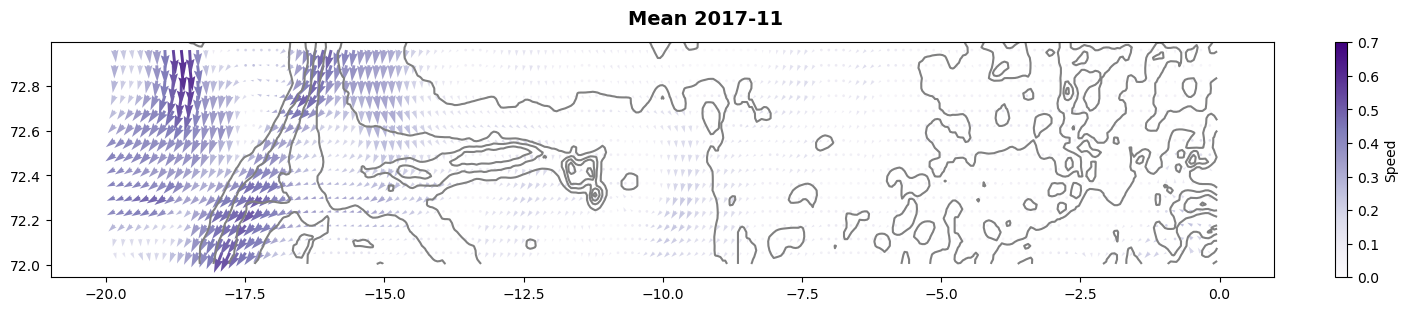

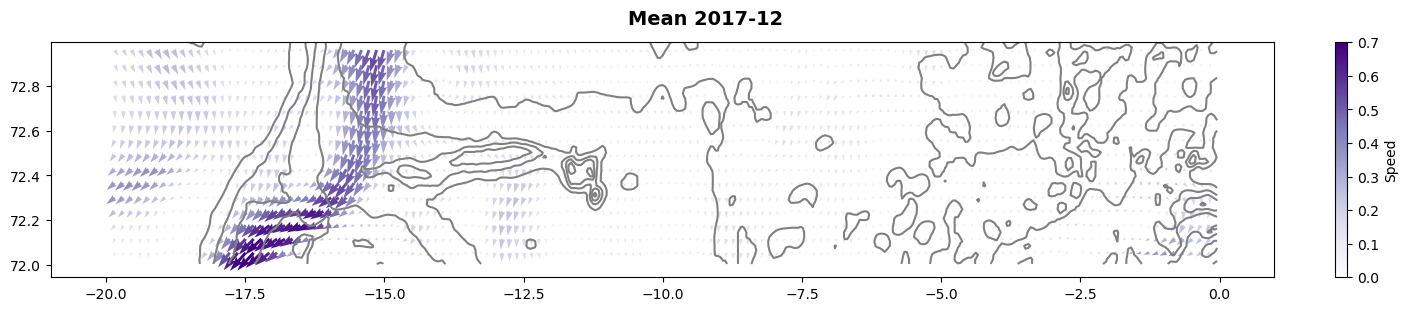

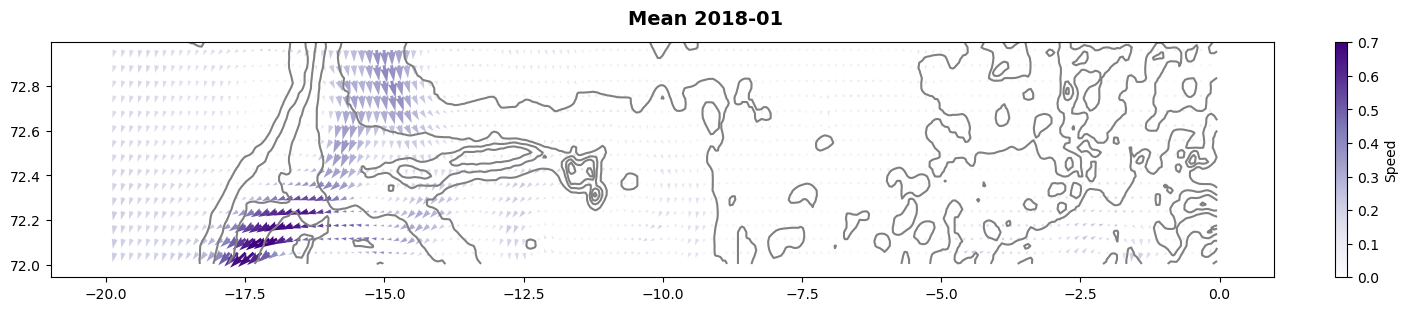

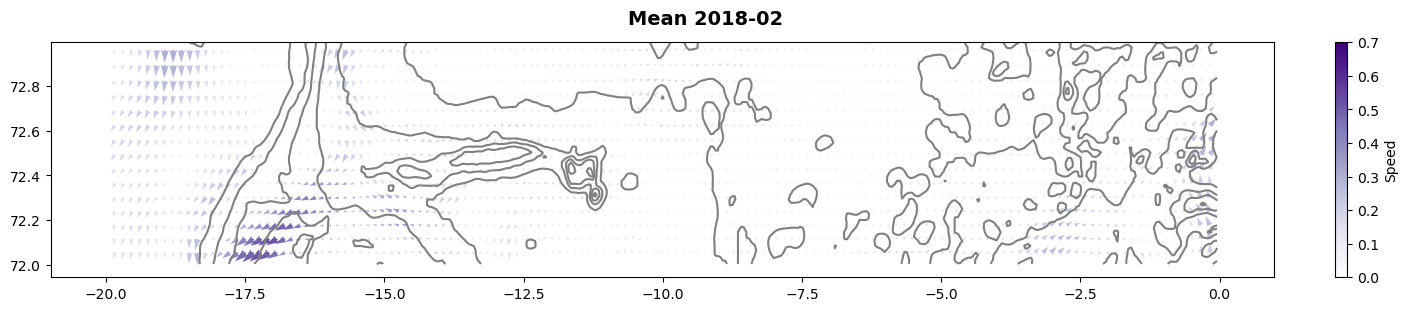

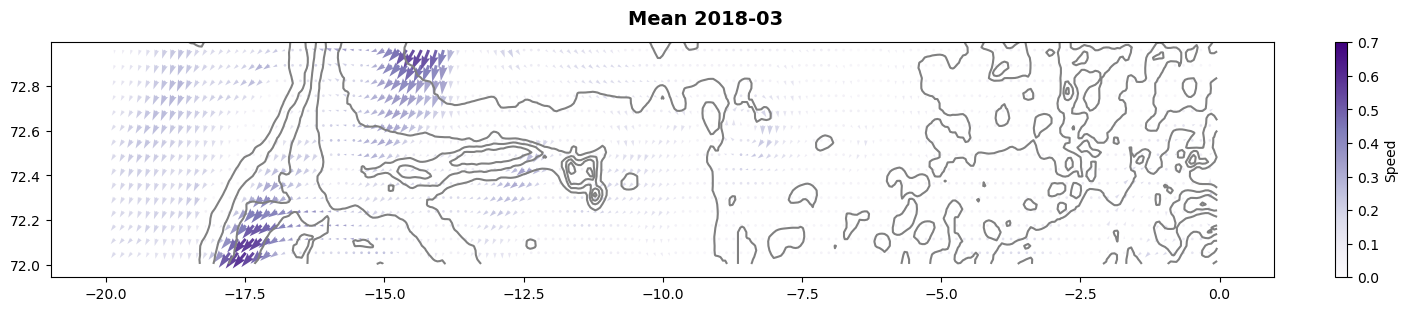

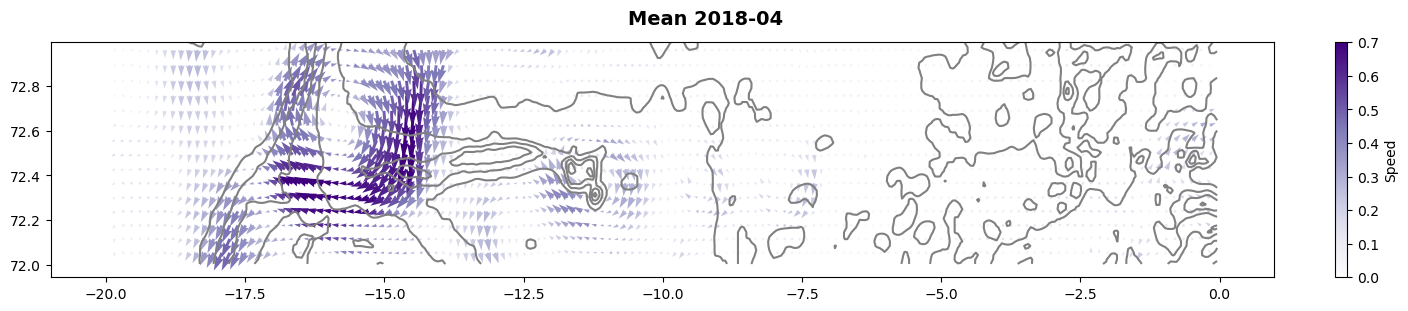

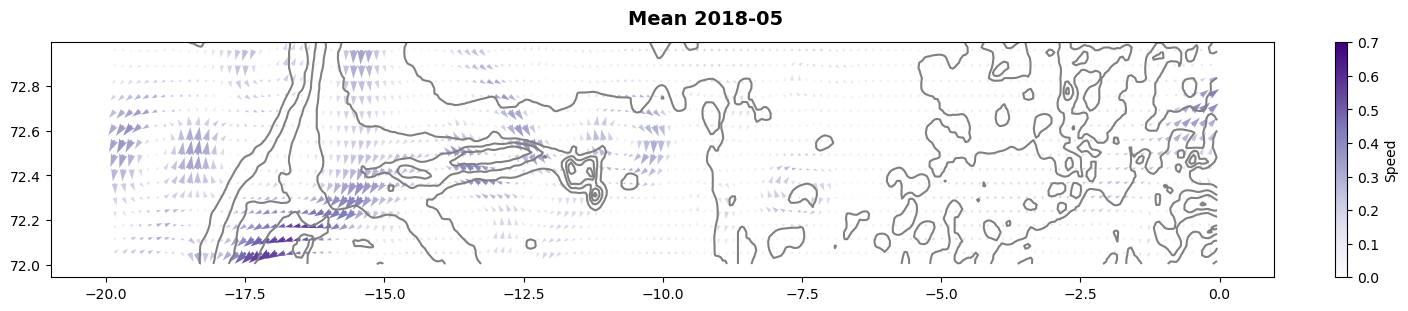

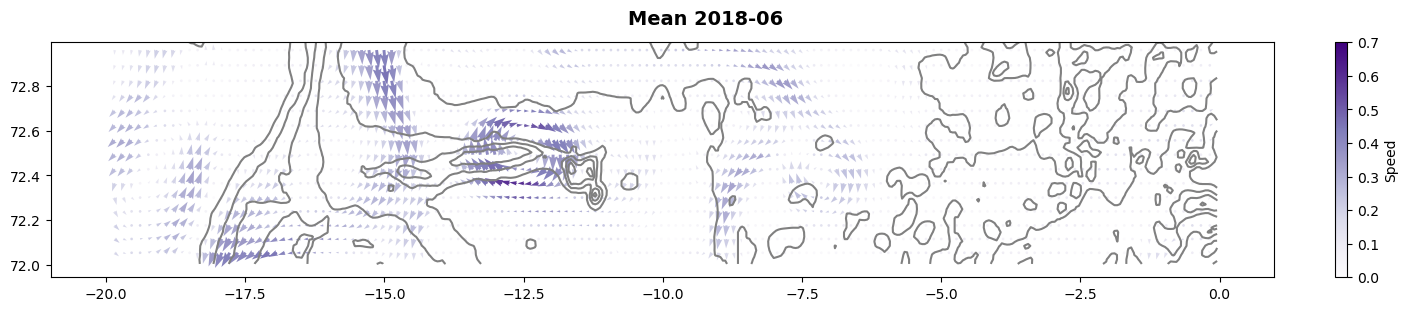

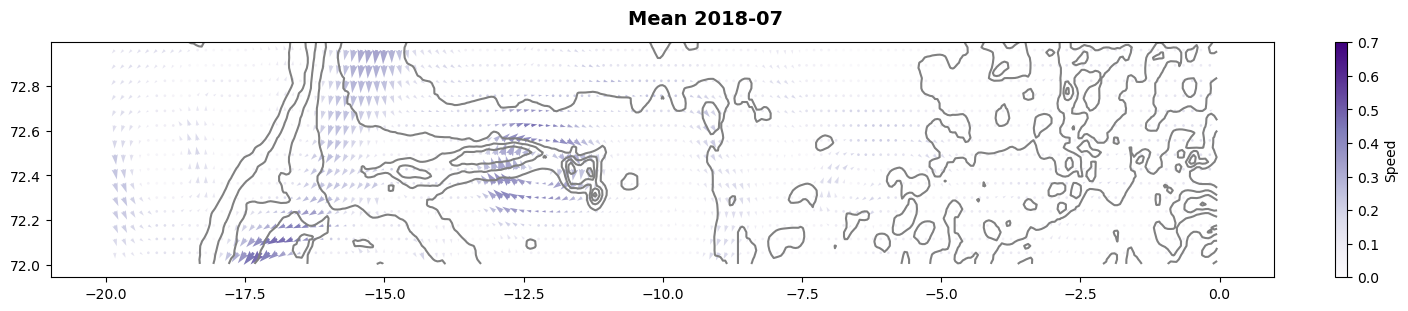

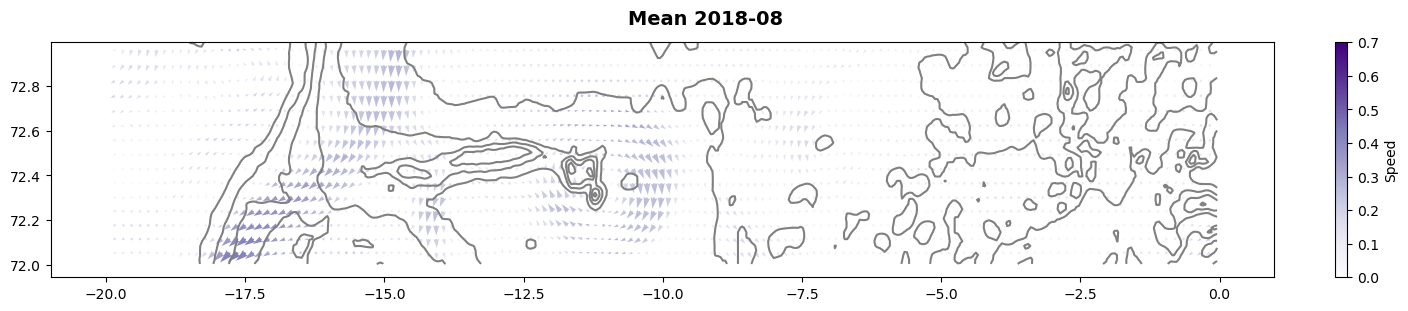

In [13]:
# Define the subsampling factor
subsample_factor = 3  # Adjust this value to control the density, e.g., 1 for highest density

# Define the vmax and vmin for the colormap
vmax = 0.7
vmin = 0

# Create a colormap object and normalization with desired limits
cmap = plt.cm.Purples
norm = plt.Normalize(vmin=vmin, vmax=vmax)

for i in range(len(U.time)):
    fig, ax = plt.subplots(figsize=[14, 3], layout='constrained')

    name = str(U.time[i].values)
    name = 'Mean ' + name[0:7]
    fig.suptitle(name, fontweight='bold', fontsize=14)

    # Extract the data for the current time step
    U_data = U.isel(time=i)
    V_data = V.isel(time=i)

    # Subsample the data
    U_data_subsampled = U_data[::subsample_factor, ::subsample_factor]
    V_data_subsampled = V_data[::subsample_factor, ::subsample_factor]
    X_subsampled = U.Xp1[::subsample_factor]
    Y_subsampled = U.Yp1[::subsample_factor]

    # Make sure X and Y are reshaped correctly to match U and V shapes
    X_subsampled, Y_subsampled = np.meshgrid(X_subsampled, Y_subsampled)

    # Calculate the speed (magnitude of the vectors)
    speed = np.sqrt(U_data_subsampled**2 + V_data_subsampled**2)

    # Normalize U and V to have a constant arrow size (if needed)
    U_normalized = U_data_subsampled # / speed
    V_normalized = V_data_subsampled # / speed

    # Create the quiver plot with constant size and colors based on speed
    quiver = ax.quiver(X_subsampled, Y_subsampled, U_normalized, V_normalized,
                       speed, cmap=cmap, norm=norm, scale=5, scale_units='xy', alpha=1)

    # Add a colorbar to show the speed scale
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('Speed')

    # Add contour plot for depth
    ax.contour(depth.X, depth.Y, depth, colors='grey')

In [14]:
V = df_V
V = V.sel(Yp1=72.4,method='nearest').sel(Xp1=-16,method='nearest').sel(Z=-1)
VM = V.mean(dim='time')
VA = V - VM

In [15]:
display(V)

<xarray.DataArray 'V_interp' (time: 1460)>
array([-0.634196, -0.708533, -0.619427, ..., -0.087341, -0.079085, -0.127994])
Coordinates:
    Z        float64 -1.0
    Xp1      float64 -16.0
    Yp1      float64 72.41
    XG       float64 ...
    YG       float64 ...
  * time     (time) datetime64[ns] 2017-09-01 ... 2018-08-31T18:00:00
Attributes:
    units:          m/s
    coordinates:    XV YV RC iter
    standard_name:  sea_water_y_velocity
    mate:           U
    long_name:      Meridional Component of Velocity

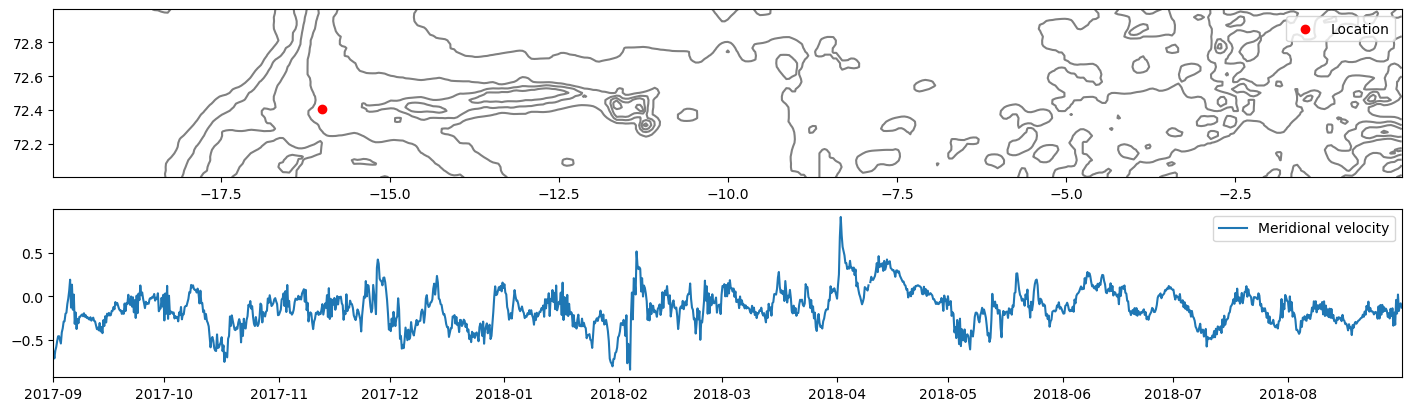

In [16]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=[14,4],layout='constrained')
ax1.contour(depth.X,depth.Y,depth,colors='grey')
ax1.scatter(V.Xp1,V.Yp1,color='red',label='Location')
ax1.legend()

ax2.plot(V.time,V,label='Meridional velocity')
ax2.set_xlim(V.time[0],V.time[-1])
ax2.legend()

In [17]:
dt = (np.diff(VA.time)/np.timedelta64(1, 'ns')) * 1e-9                   # Compute differences among different timesteps. Convert nanoseconds into seconds
dt = np.round(np.mean(dt)/3600)
print("Delta T = ", dt, " hours")

Fs = 1/dt
print("Frequency is: ",Fs)

#Total number of points
N = len(V)
print('The number of data points is: ', N)

# Nyquist interval 1/(2*dT)
# Print, lowest and highest frequencies of the spectrum
f0=1/(N*dt)
print(f"The lower limit of the spetrum will be: {f0} cph")

#higher limit of spectrum: fN=1/(2*dt)
fN=1./(2*dt)
print(f"The upper limit of the spetrum will be: {fN} cph")

# Number of frequencies
ftot = N/2
print("The largest number of frequencies in the frequency range is: %d" % ftot)

display(V.Yp1.values)

Delta T =  6.0  hours
Frequency is:  0.16666666666666666
The number of data points is:  1460
The lower limit of the spetrum will be: 0.00011415525114155251 cph
The upper limit of the spetrum will be: 0.08333333333333333 cph
The largest number of frequencies in the frequency range is: 730


array(72.40739675)

In [18]:
from scipy import signal
import pandas as pd

Inertial frequency (Hz): 0.00013902092519124947


array([-0.63419629, -0.70853256, -0.61942736, ..., -0.08734074,
       -0.07908536, -0.12799364])

1460

21600.0

Sampling Frequency (Hz): 4.6296296296296294e-05


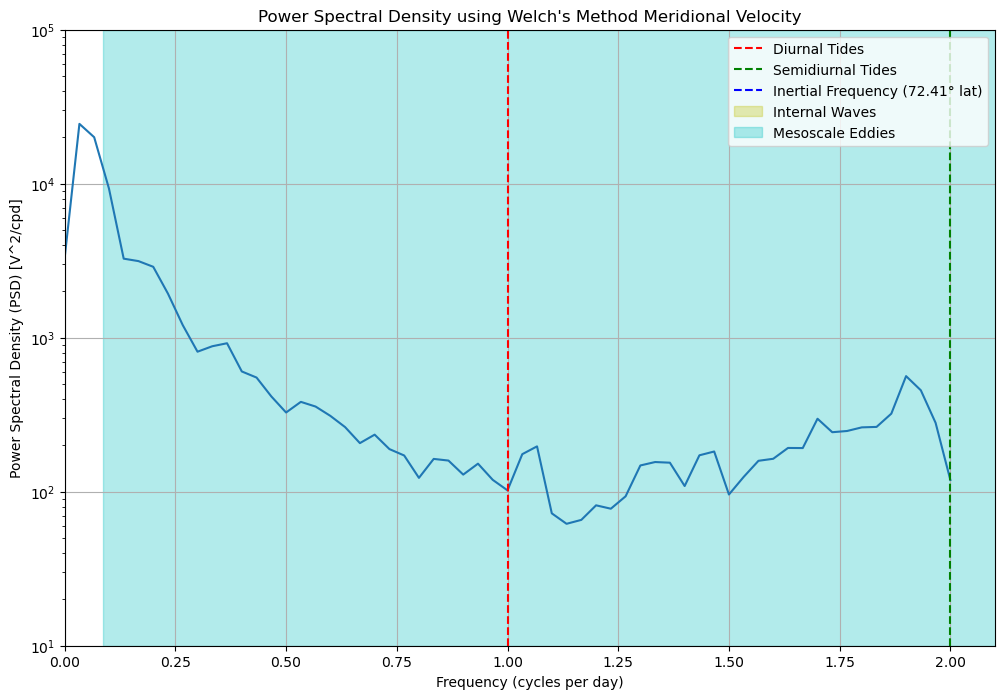

In [45]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt


# Constants
omega = 7.2921e-5  # Earth's rotation rate in radians per second
latitude = 72.40739675  # Latitude in degrees

# Convert latitude to radians
latitude_rad = np.radians(latitude)

# Calculate the inertial frequency
inertial_frequency = 2 * omega * np.sin(latitude_rad)
print("Inertial frequency (Hz):", inertial_frequency)

# Extract the data and time values
data = V.values
time = V.time.values

# Handle NaN values by interpolation
data = np.interp(np.arange(len(data)), np.arange(len(data))[~np.isnan(data)], data[~np.isnan(data)])

display(data)
display(len(data))
N = len(data)
hp2 = 12   

# Compute the sampling frequency (assuming regular intervals)
sampling_interval = (time[1] - time[0]) / np.timedelta64(1, 's')
display(sampling_interval)
fs = 1 / sampling_interval
print("Sampling Frequency (Hz):", fs)

# Use scipy.signal.welch to compute the power spectral density

seg_lenght = 4*30

frequencies, psd = welch(data,
                        fs=fs,
                        window='hamming',
                        nperseg = seg_lenght,
                        noverlap = 0.5*seg_lenght,
                        scaling = 'density',
                        average='mean')

# Convert frequencies from Hz to cycles per day
frequencies_cpd = frequencies * 86400  # 86400 seconds in one day

# Define interesting frequency ranges in cycles per day
diurnal_freq_cpd = 1 / 1  # 1 cycle per day (diurnal)
semidiurnal_freq_cpd = 2 / 1  # 2 cycles per day (semidiurnal)
inertial_freq_cpd = inertial_frequency * 86400  # Convert to cycles per day

# Plot the PSD with the x-axis in cycles per day
fig, ax = plt.subplots(figsize=(12, 8))
ax.semilogy(frequencies_cpd, psd)
ax.set_xlabel('Frequency (cycles per day)')
ax.set_ylabel('Power Spectral Density (PSD) [V^2/cpd]')
ax.set_title('Power Spectral Density using Welch\'s Method Meridional Velocity')
ax.axvline(x=diurnal_freq_cpd, color='r', linestyle='--', label='Diurnal Tides')
ax.axvline(x=semidiurnal_freq_cpd, color='g', linestyle='--', label='Semidiurnal Tides')
ax.axvline(x=inertial_freq_cpd, color='b', linestyle='--', label='Inertial Frequency (72.41° lat)')
ax.axvspan(1e-4 * 86400, 1e-2 * 86400, color='y', alpha=0.3, label='Internal Waves')
ax.axvspan(1e-6 * 86400, 1e-4 * 86400, color='c', alpha=0.3, label='Mesoscale Eddies')
ax.set_xlim(0, 2.1)  # Adjust x-axis limit as per the new scale
ax.set_ylim(1e1, 1e5)
ax.grid()
ax.legend()